 # This is my first notebook on Machine Learning
 # This is a Model for a classification problem
 
 ## BY: Monica.M.Mbabazi
 
 reg:

In [2]:
#Here i am importing all the necessary libraries to be used in this analysis
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt# for plotting
#for plots to be embedded directly within the notebook use the code below
%matplotlib inline 
from sklearn.preprocessing import StandardScaler
import seaborn as sns #data visualization library based on matplotlib
from sklearn.metrics import matthews_corrcoef
import os # for accessing directory structures
# let's us remove all the uncessary warnings from our cells
import warnings
warnings.filterwarnings('ignore')

# Input data files to be used are available in "../input/" directory.
# running the below command lists all the availabe files under the input directory

#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
# let's check our current working directory using the os modules
os.getcwd()

## From the above, it shows that i have two csv files to work with in this analysis.
 - Test.csv
 - AMP_TrainSet.csv

### Now let us load and read in our data with the code below and assign it to new names. Here we use the "pd.read_csv" since the files are in csv format. CSV files are comma separated files.

### Also, we have to check the dimensions of our data and this helps us to get an insight about the data we are working with in terms of how big the data is.

In [3]:
# Loading the dataset1 (AMP_TrainSet.csv). Our datasets are csv files and a csv is a comma separated file
Train=pd.read_csv("../AMP Data Sets/AMP_TrainSet.csv", delimiter=',')
nRow, nCol = Train.shape
print(f'There are {nRow} rows and {nCol} columns')


There are 3038 rows and 12 columns


In [4]:
type(Train) ## It is always to know the type of the data you are working with.

pandas.core.frame.DataFrame

In [5]:
# Loading the dataset2 (Test.csv)
Test=pd.read_csv("../AMP Data Sets/Test.csv", delimiter=',')
nRow, nCol = Test.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 758 rows and 11 columns


In [6]:
Test.info()#info() function shows the number of rows and columns and displays the type of each attribute

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 11 columns):
FULL_Charge           758 non-null float64
FULL_AcidicMolPerc    758 non-null float64
FULL_AURR980107       758 non-null float64
FULL_DAYM780201       758 non-null float64
FULL_GEOR030101       758 non-null float64
FULL_OOBM850104       758 non-null float64
NT_EFC195             758 non-null int64
AS_MeanAmphiMoment    758 non-null float64
AS_DAYM780201         758 non-null float64
AS_FUKS010112         758 non-null float64
CT_RACS820104         758 non-null float64
dtypes: float64(10), int64(1)
memory usage: 65.2 KB


### Based on the data dimensions above, it tells me that i am working with small datasets. And this gives me an idea of the kind of algorithm i need to use.
- One having 3038 observations and 12 features/variables (Train)
- Another dataset having 758 observations/records and 11 features (Test)

## Data dimensions
### We can merge our two datasets for the purpose of pre-processing stage, since this does not affect the predictions of the model.
> You need to know how much data you have both in terms of row and column number
- This will give an insight on how much time the algorithm might take to train, algorithms take long to train on data with many rows and fewer rows may lead to underfitting of the model.
- Too many features/columns may cause overfitting of some algorithms due to the curse of dimensionality.

In [7]:
#combining two datasets for the ease of the pre-processing step 
Combined_data=Train.append(Test)
# let's check the dimension of the combined data
nRow, nCol = Combined_data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 3796 rows and 12 columns


### Let's take a quick look at what the data looks like:This helps us to know whether our data is clean and how it is presented.
> let's us diplay the first few rows

In [8]:
#displaying the first 5 rows of our combined data
Combined_data.head(5)

,AS_DAYM780201,AS_FUKS010112,AS_MeanAmphiMoment,CLASS,CT_RACS820104,FULL_AURR980107,FULL_AcidicMolPerc,FULL_Charge,FULL_DAYM780201,FULL_GEOR030101,FULL_OOBM850104,NT_EFC195
0,73.444,5.661,0.282,1.0,1.041,0.951,0.000,5.0,74.842,0.975,-3.663,0
1,68.222,6.537,0.600,1.0,1.453,0.931,5.405,4.0,71.595,0.957,-4.011,1
2,69.444,4.934,0.593,1.0,1.722,0.873,5.405,5.5,73.595,0.961,-2.512,0
3,67.222,4.316,0.614,1.0,1.382,0.895,4.167,5.0,66.250,0.999,-1.362,0
4,72.944,4.540,0.616,1.0,1.539,0.932,8.537,7.5,64.720,0.979,-2.091,0


### we can have a look on the column names of our data because these are the features we shall use do plot our data.

In [9]:
Combined_data.columns # This prints out the column names

Index(['AS_DAYM780201', 'AS_FUKS010112', 'AS_MeanAmphiMoment', 'CLASS',
       'CT_RACS820104', 'FULL_AURR980107', 'FULL_AcidicMolPerc', 'FULL_Charge',
       'FULL_DAYM780201', 'FULL_GEOR030101', 'FULL_OOBM850104', 'NT_EFC195'],
      dtype='object')

## Data Type For Each Attribute
> Understanding the type of each attribute is very important. In case of the presence of strings, we may need to convert them to floats or integers.


In [10]:
# Checeking for the data types of each attribute
Combined_data.dtypes

AS_DAYM780201         float64
AS_FUKS010112         float64
AS_MeanAmphiMoment    float64
CLASS                 float64
CT_RACS820104         float64
FULL_AURR980107       float64
FULL_AcidicMolPerc    float64
FULL_Charge           float64
FULL_DAYM780201       float64
FULL_GEOR030101       float64
FULL_OOBM850104       float64
NT_EFC195               int64
dtype: object

<div class = 'alert alert-danger'>
## Descriptive Statistics
### Descriptive statistics can give us great insight into the shape of each attribute. helps you to understand your data and is a very important part of Machine Learning. This is due to Machine Learning being all about making predictions.
### They will help you understand better what your data is trying to tell you, which will result in an overall better machine learning model and understanding.
### Central tendency which in this case is indicated by 'mean'determines the tendency for the values of your data to cluster around its mean.
###  interquartile range (IQR)and standard deviation measure the amount of spread or variability within your data.
> By default the describe() function on the Pandas lists 8 statistical properties of each attribute as indicated in the output below.

In [11]:
## Displays the basic statical properties using the describe() function
Combined_data.describe()

,AS_DAYM780201,AS_FUKS010112,AS_MeanAmphiMoment,CLASS,CT_RACS820104,FULL_AURR980107,FULL_AcidicMolPerc,FULL_Charge,FULL_DAYM780201,FULL_GEOR030101,FULL_OOBM850104,NT_EFC195
count,3796.000000,3796.000000,3796.000000,3038.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000
mean,73.689442,5.909989,15.660636,0.500000,1.238237,0.971737,8.606101,2.062961,73.699337,0.994048,-2.425937,0.087724
std,9.115709,0.686423,11.532034,0.500082,0.211707,0.108059,7.633520,3.904811,8.429593,0.031539,1.685668,0.282930
min,42.778000,3.533000,0.041000,0.000000,0.785000,0.684000,0.000000,-16.000000,42.750000,0.866000,-10.432000,0.000000
25%,67.667000,5.462000,5.629750,0.000000,1.085750,0.895000,2.632000,0.000000,68.415750,0.974000,-3.574250,0.000000
50%,73.677500,5.927000,15.012000,0.500000,1.185000,0.963000,7.143000,2.000000,74.059500,0.994000,-2.283500,0.000000
75%,79.889000,6.381000,26.514000,1.000000,1.356000,1.042000,13.333000,4.000000,79.321750,1.011000,-1.289000,0.000000
max,103.167000,8.662000,51.280000,1.000000,2.283000,1.451000,46.667000,30.000000,102.929000,1.196000,3.576000,1.000000


## Class Distribution
> When solving Classification problems in Machine Learning, we need to know how class values are balanced.

>Imbalanced classes are a common problem in machine learning classification where there are a disproportionate ratio of observations in each class.

>Most machine learning algorithms work best when the number of samples in each class are about equal. This is because most algorithms are designed to maximize accuracy and reduce error.

>Highly imbalanced data may need special handling in the data preparation stage and below are different popular methods of dealing with class imbalance
- Change the performance metric: As we saw above, accuracy is not the best metric to use when evaluating imbalanced datasets as it can be very misleading. Metrics that can provide better insight include: Confusion Matrix, precision and F1 Score.

- Change the algorithm: While in every machine learning problem, it’s a good rule of thumb to try a variety of algorithms, it can be especially beneficial with imbalanced datasets. Decision trees frequently perform well on imbalanced data.

- Resampling Techniques: We can Oversample minority class or Undersample majority class
> Oversampling can be defined as adding more copies of the minority class.However, this can lead to overfitting and poor generization to the test data.

>Undersampling can be defined as removing some observations of the majority class.However,it could lead to underfitting and poor generalization to the test set.
- Generate synthetic samples: A technique similar to upsampling is to create synthetic samples. Here we will use imblearn’s SMOTE or Synthetic Minority Oversampling Technique.

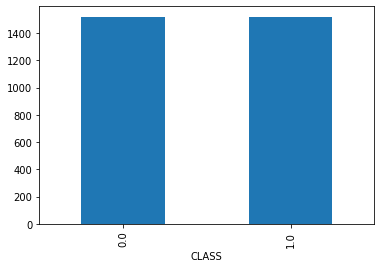

In [12]:
# This shows the distribution of the class
# We only do this when we are solving a classification problem 
Combined_data.groupby('CLASS').size().plot(kind='bar')

### Our data has well balanced class values, so no need to balance it at the preparation step.

## Correlations Between Attributes
>Correlation refers to the relationship between two variables and how they may or may notchange together. The most common method for calculating correlation is Pearson's Correlation Coefficient, that assumes a normal distribution of the attributes involved.

>Correlation analysis is an extensively used technique that identifies interesting relationships in data. Correlation is used as a basic quantity for many modelling techniques.

>A correlation of -1 or 1 shows a full negative or positive correlation respectively. Whereas a value of 0 shows no correlation at all. Some machine learning algorithms like linear and logistic regression can suffer poor performance if there are highly correlated attributes in your dataset.

### Feature correlation is considered one important step in the feature selection phase of the data pre-processing especially if the data type for the features is continuous.
#### One or multiple attributes depend on another attribute or a cause for another attribute or associated with other attributes.
#### Pearson Correlation Coefficient can be used with continuous variables that have a linear relationship 
#### If the variables have a non-linear relationship, we can measure the correlation using Spearman Correlation Coefficient
## So, why is correlation useful in this case of ML?
- Correlation can help in predicting one attribute from another (Great way to impute missing values).
- Correlation can (sometimes) indicate the presence of a causal relationship.

### If your dataset has perfectly positive or negative attributes then there is a high chance that the performance of the model will be impacted by a problem called “Multicollinearity”.
> Multicollinearity happens when one predictor variable can be linearly predicted from the others with a high degree of accuracy. This can lead to skewed or misleading results.

>It is clear that correlated features means that they bring the same information, so it is logical to remove one of them.Removing correlated features helps to infer meaning about the features.

> Luckily,some algorithms like decision trees and boosted trees are immune to multicollinearity by nature. When they decide to split, the tree will choose only one of the perfectly correlated features. However, other algorithms like Logistic Regression or Linear Regression are not immune to that problem and you should fix it before training the model.
### How Can I Deal With This Problem?
>There are multiple ways to deal with this problem. The easiest way is to delete or eliminate one of the perfectly correlated features.

>Another way is to use a dimension reduction algorithm such as Principle Component Analysis (PCA).

In [13]:
# pairwise correlations of the attributes in our dataset. By default the correlation function uses the pearsons coefient method
Combined_data.corr(method='pearson')

,AS_DAYM780201,AS_FUKS010112,AS_MeanAmphiMoment,CLASS,CT_RACS820104,FULL_AURR980107,FULL_AcidicMolPerc,FULL_Charge,FULL_DAYM780201,FULL_GEOR030101,FULL_OOBM850104,NT_EFC195
AS_DAYM780201,1.000000,0.057207,-0.302937,-0.437168,-0.254529,0.446810,0.440061,-0.358091,0.885507,-0.021886,0.268279,-0.044045
AS_FUKS010112,0.057207,1.000000,0.022269,0.033432,-0.436554,0.054272,0.029507,-0.095932,0.070613,0.043077,-0.440203,0.149506
AS_MeanAmphiMoment,-0.302937,0.022269,1.000000,0.693552,0.165794,-0.412692,-0.416632,0.346463,-0.394194,-0.160426,-0.323673,0.163492
CLASS,-0.437168,0.033432,0.693552,1.000000,0.267652,-0.584111,-0.598816,0.534602,-0.554838,-0.260470,-0.453287,0.260702
CT_RACS820104,-0.254529,-0.436554,0.165794,0.267652,1.000000,-0.410244,-0.229719,0.234347,-0.329130,-0.168609,0.140858,0.078852
FULL_AURR980107,0.446810,0.054272,-0.412692,-0.584111,-0.410244,1.000000,0.798660,-0.495532,0.542345,0.361695,0.460595,-0.160494
FULL_AcidicMolPerc,0.440061,0.029507,-0.416632,-0.598816,-0.229719,0.798660,1.000000,-0.617659,0.535891,0.122708,0.505538,-0.131539
FULL_Charge,-0.358091,-0.095932,0.346463,0.534602,0.234347,-0.495532,-0.617659,1.000000,-0.431318,-0.054781,-0.279763,0.079432
FULL_DAYM780201,0.885507,0.070613,-0.394194,-0.554838,-0.329130,0.542345,0.535891,-0.431318,1.000000,0.024265,0.327757,-0.091068
FULL_GEOR030101,-0.021886,0.043077,-0.160426,-0.260470,-0.168609,0.361695,0.122708,-0.054781,0.024265,1.000000,0.324516,-0.221596


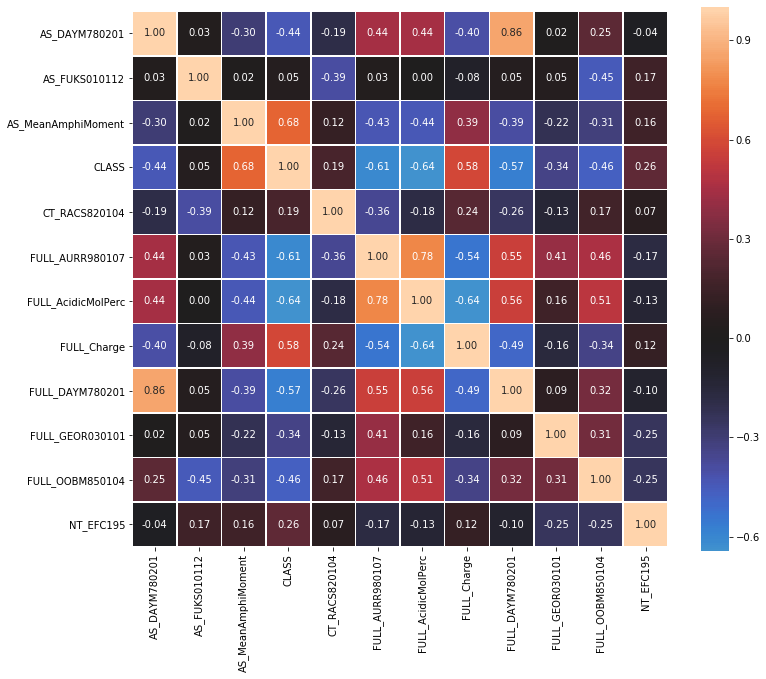

In [14]:
#let us also plot a heat map to get the correlation between the attributes of the data
corr=Combined_data.corr(method='spearman')
fig=plt.figure(figsize=(12,10))
#fig=plt.subplots(figsize=(10,10)) works too
sns.heatmap(corr, vmax=1.0,center=0,annot=True,square=True,linewidths=.5,fmt='.2f')
#sns.heatmap(Combined_data.corr(method='pearson'))## this code can also do the same


### Determining how each attribute in our data correlates with the 'CLASS' attribute.
> CLASS attribute is what we intend to predict with our model in the test data, so understanding how other attributes correlate with it is very important.

>Correlation can (sometimes) indicate the presence of a causal relationship.
- This gives us an insight on which attributes can make the predicted variable more accurate. And we can also be able to eliminate those attributes that are irrelevant and can decrease the model accuracy and quality.

In [15]:
#Let's also check the correlation in regards to the CLASS
#this is valuable especially when we are trying to build an ML model for that CLASS
Combined_data.corr(method='pearson')['CLASS']

AS_DAYM780201        -0.437168
AS_FUKS010112         0.033432
AS_MeanAmphiMoment    0.693552
CLASS                 1.000000
CT_RACS820104         0.267652
FULL_AURR980107      -0.584111
FULL_AcidicMolPerc   -0.598816
FULL_Charge           0.534602
FULL_DAYM780201      -0.554838
FULL_GEOR030101      -0.260470
FULL_OOBM850104      -0.453287
NT_EFC195             0.260702
Name: CLASS, dtype: float64

## Skew of Distributions
>Skew refers to a distribution that is assumed Gaussian (normal or bell curve) that is shifted or squashed in one direction or another. Many machine learning algorithms assume a Gaussian distribution. 

>Skewed data is common in data science; and this is simply the degree of distortion from a normal distribution. So,knowing that an attribute has a skew may allow us to perform data preparation to correct the skew and later improve the accuracy of your models.

>The data can be either positive skewed(when the curve is more deviated towards the right) or negatively skewed (the curve is more deviated towards the left). If skewness value lies above +1 or below -1,  data is highly skewed
- it is recommended to fix the skewness to make good decisions by the model.
- A log transformation can help to fit a very skewed distribution into a Gaussian one. It and can be used to reduce right skewness.
- If the tail is to the left of data, then it is called left skewed data or negatively skewed data. Common transformations include square , cube root and logarithmic. 


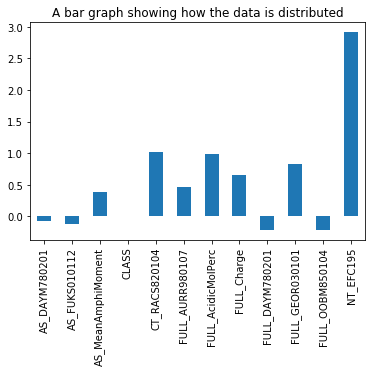

In [16]:
# A bar plot showing how data is skewed
Combined_data.skew().plot(kind='bar',title='A bar graph showing how the data is distributed')

> Based on the above, our data is kind of normally distributed, so can work with it.

## Understand more of our Data With Visualization
>Understanding the data is very important in machine learning, this helps you to know what to be done at the pre-processing stage to ensure better results of your model.

>The fastest way to learn more about your data is to use data visualization and we can use some of the common plots below:

- Histograms.
- Density Plots.
- Box and Whisker Plots
- Scatter Plot Matrix: This is a multivariate plot

### Histograms
#### A histogram is a plot of the frequency distribution of numeric array by splitting it to small equal-sized bins.
#### Since histograms group data into bins and give us an idea of how many observations each bin holds, this is a good way to visualize data for ML. The shapes of the bins tell us whether an attribute is Gaussian, skewed, or has an exponential distribution. It also hints us about outliers.
#### Histograms help give an estimate as to where values are concentrated, what the extremes are and whether there are any gaps or unusual values. 
#### They are also useful for giving a rough view of the probability distribution.

<Figure size 1080x1080 with 0 Axes>

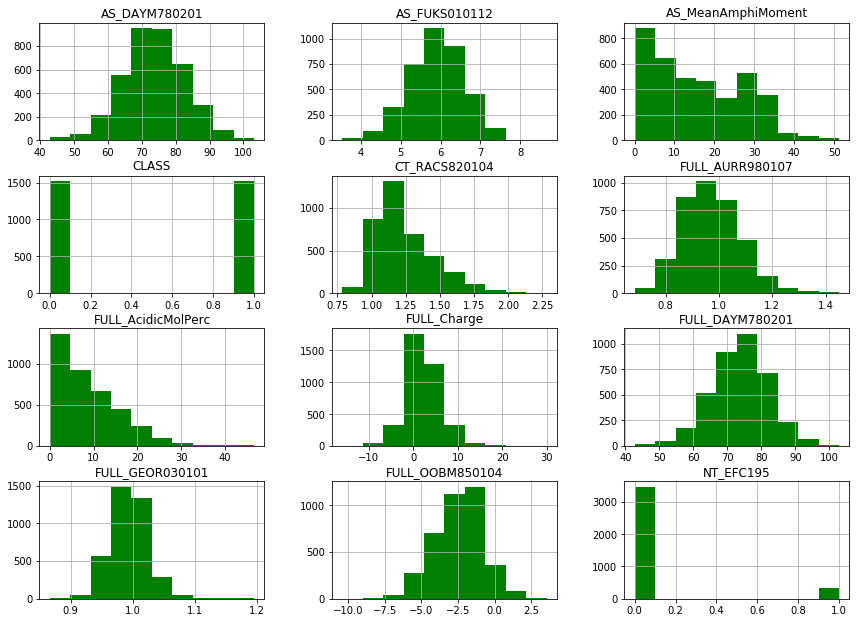

In [17]:
## Data visualization using a histogram plot
plt.figure(figsize=(15,15))
Combined_data.hist(color='g')
plt.subplots_adjust(bottom=1, right=2, top=3)
plt.show()


#### Based on the above histograms, we can tell that most of our variables are continous but two of the variables (CLASS and NT_EFC195) are categorical.

### Density Plots
>Density plots are another way of getting a quick idea of the distribution of each attribute. The plots look like an abstracted histogram with a smooth curve drawn through the top of each bin.

>An advantage Density Plots have over Histograms is that they're better at determining the distribution shape because they're not affected by the number of bins used 

<function matplotlib.pyplot.show(*args, **kw)>

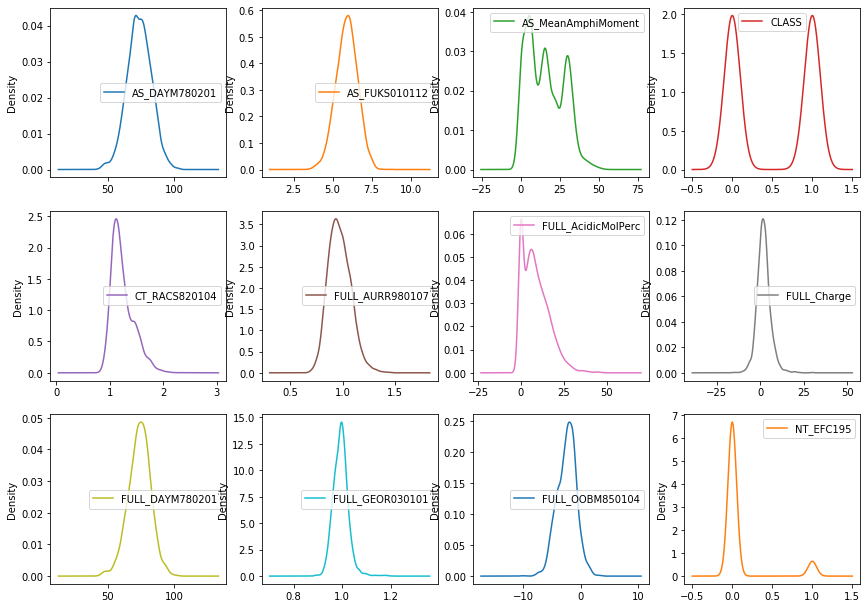

In [18]:
#Density plot showing the distribution of each attribute
Combined_data.plot(kind='density', subplots=True, layout=(3,4), sharex=False)
plt.subplots_adjust(bottom=1, right=2, top=3)
plt.show

### Box and Whisker Plots
>Another useful way to review the distribution of each attribute is to use Box and Whisker Plots or boxplots for short. Boxplots summarize the distribution of each attribute, drawing a line for the median (middle value) and a box around the 25th and 75th percentiles (the middle 50% of the data). The whiskers give an idea of the spread of the data and dots outside of the whiskers show candidate outlier values (values that are 1.5 times greater than the size of spread of the middle 50% of the data). 

>You need to have information on the variability or dispersion of the data. A boxplot is a graph that gives you a good indication of how the values in the data are spread out.

>Boxplots are a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).
- These plots are usually good to show the outliers in the data
- Let’s plot this for our dataset.

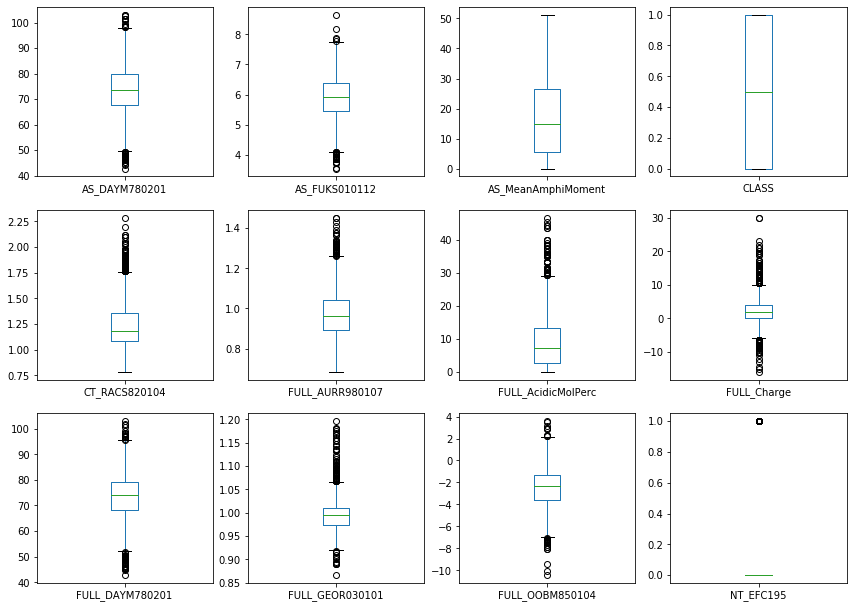

In [19]:
Combined_data.plot(kind='box', subplots=True, layout=(3,4), sharex=False, sharey=False)
plt.subplots_adjust(bottom=1, right=2, top=3)
plt.show()


### Scatter Plot Matrix
>A scatter plot shows the relationship between two variables as dots in two dimensions, one axis for each attribute. You can create a scatter plot for each pair of attributes in your data. Drawing all these scatter plots together is called a scatter plot matrix. Scatter plots are useful for spotting structured relationships between variables, like whether you could summarize the relationship between two variables with a line. Attributes with structured relationships may also be correlated and good candidates for removal from your dataset.

>A scatter matrix is a estimation of covariance matrix when covariance cannot be calculated or costly to calculate. 

>The scatter matrix is also used in lot of dimensionality reduction exercises.

>Scatter plots show how much one variable is affected by another or the relationship between them with the help of dots in two dimensions.

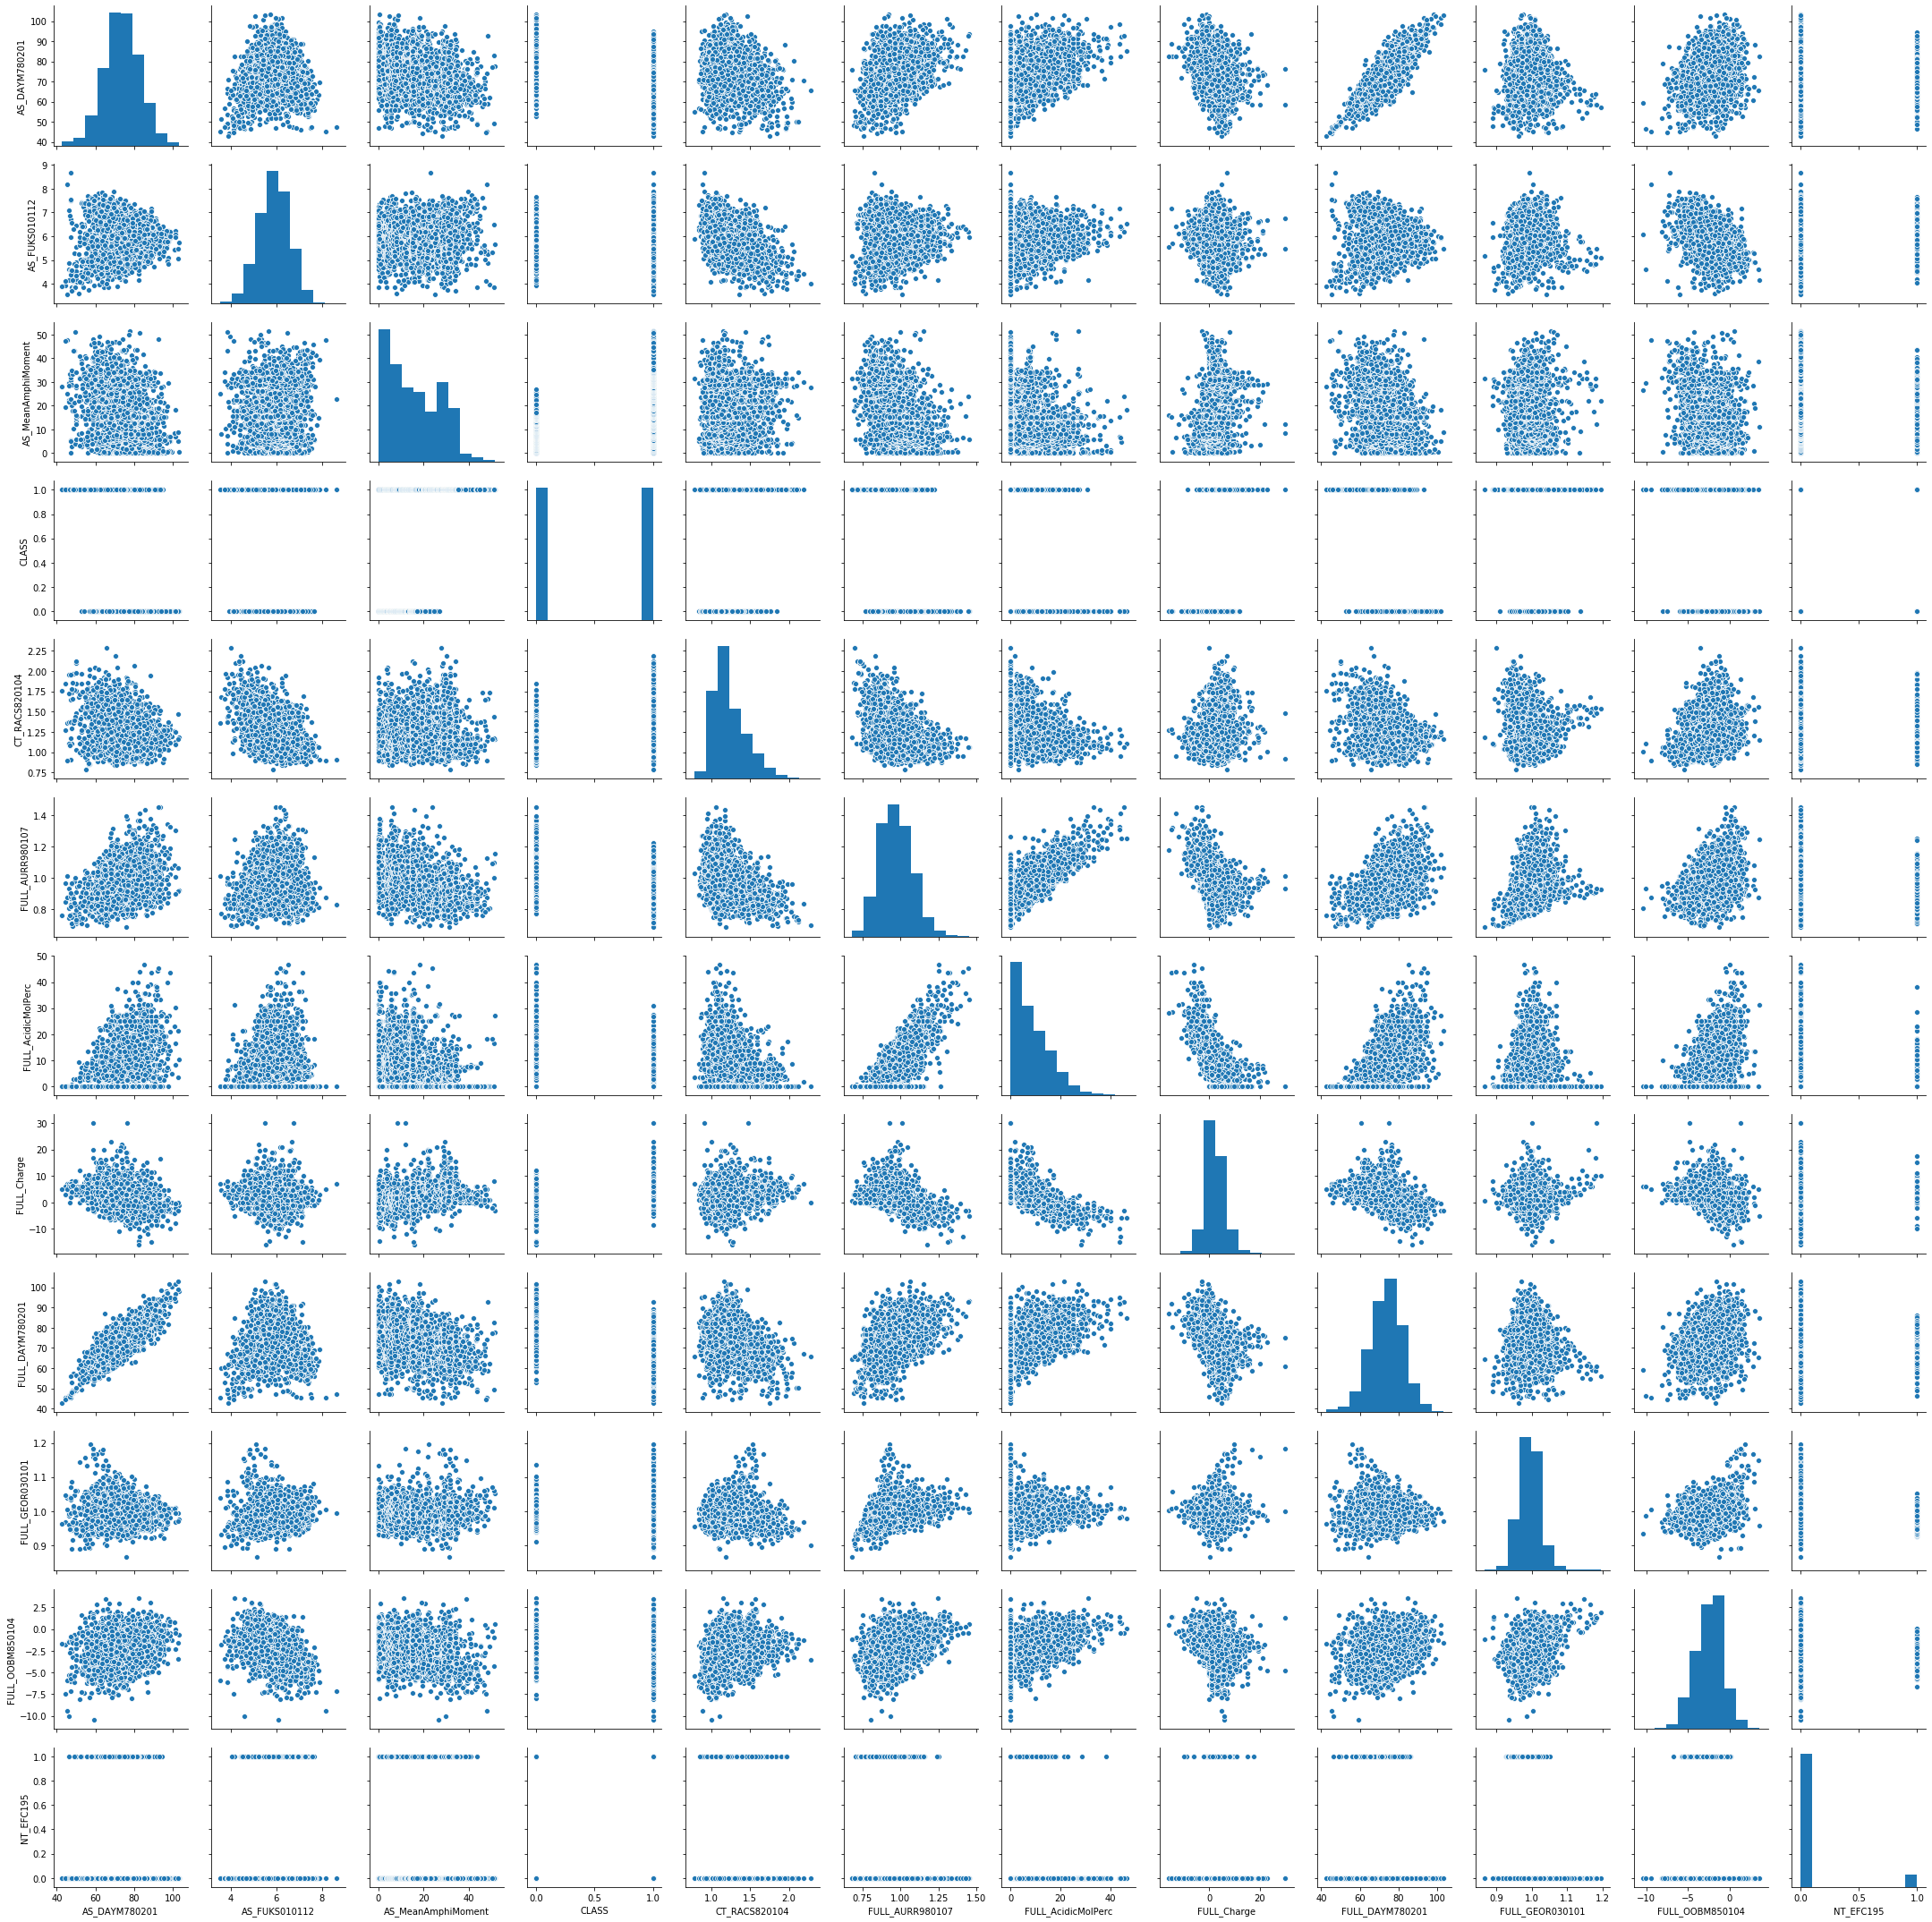

In [20]:
## Plotting a scatter plot to understand the relationship between two variables 
sns.pairplot(Combined_data)

#### The left diagonal of the above plot has histograms of the attributes because it doesn’t make much sense to plot an attribute’s scatterplot with itself.

## Preparation of the Data For Machine Learning
### Pre-processing refers to the transformations applied to the data before feeding it to the algorithm. it is a technique that is used to convert the raw data into a clean data set.
#### Machine Learning models are as good or as bad as the data you have. That’s why we need to spend hours on pre-processing and cleansing our data.
#### Data Preprocessing is that step in which the data gets transformed, or Encoded, to bring it to such a state that now the machine can easily parse it. In other words, the features of the data can now be easily interpreted by the algorithm
#### Many machine learning algorithms make assumptions about your data. It is often a very good idea to prepare your data in such way to best expose the structure of the problem to the machine learning algorithms that you intend to use. 
#### Normalization is a good technique to use when you do not know the distribution of your data or when you know the distribution is not Gaussian (a bell curve), in this case since our data is kind of normally distributed, we can leave out the normalization step.
##### Data preprocessing includes the following steps:
- **Rescale data.**

- **Standardize data:** Standardize Data: Standardization is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1.

>It is sometimes referred to as “whitening” Standardization assumes that your observations fit a Gaussian distribution (bell curve) with a well behaved mean and standard deviation. You can still standardize your data if this expectation is not met, but you may not get reliable results.
We can standardize data using scikit-learn with the StandardScaler class
- **Normalize data.**
- **Binarize data.**

## Rescale Data
### This done when the data is comprised of attributes with varying scales and many machine learning algorithms can benet from rescaling the attributes to all have the same scale.
### This is useful for optimization algorithms in used in the core of machine learning algorithms like gradient descent.
- In this i will use the MinMaxScaler from sklearn.preprocessing.

In [21]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
array=Train.values # Here we shall use the 
# let's split our training data between X and Y, so that we another set for validation
#To rescale our data, we will use the MinMaxScaler 
X = array[:,0:11]
Y = array[:,11]
scaler = MinMaxScaler(feature_range=(0, 1)) # we need all the values to be betweeen 0 and 1
rescaledX = scaler.fit_transform(X)
# summarize transformed data
np.set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[0.457 0.    0.348 0.545 0.33  0.483 0.    0.005 0.508 0.415 0.182]
 [0.435 0.116 0.322 0.489 0.276 0.458 1.    0.011 0.421 0.586 0.475]
 [0.467 0.116 0.246 0.523 0.288 0.565 0.    0.011 0.442 0.273 0.666]
 [0.457 0.089 0.275 0.399 0.403 0.647 0.    0.011 0.405 0.153 0.424]
 [0.511 0.183 0.323 0.373 0.342 0.595 0.    0.011 0.5   0.196 0.536]]


## Feature Selection For Machine Learning
#### Feature Selection is the process where you automatically or manually select those features which contribute most to your prediction variable or output in which you are interested in.
#### Having irrelevant features in your data can decrease the accuracy of the models and make your model learn based on irrelevant features,especially linear algorithms like linear and logistic regression.
## Methods of feature selection in ML
### Filter method: 
>This method uses the variable ranking technique in order to select the variables for ordering and here, the selection of features is independent of the classifiers used. 

>By ranking, it means how much useful and important each feature is expected to be for classification. It basically selects the subsets of variables as a pre-processing step independently of the chosen predictor. Some examples of filter methods are mentioned below:
- Chi-Square Test: In general term, this method is used to test the independence of two events. If a dataset is given for two events, we can get the observed count and the expected count and this test measures how much both the counts are derivate from each other.
- Variance Threshold: This approach of feature selection removes all features whose variance does not meet some threshold. Generally, it removes all the zero-variance features which means all the features that have the same value in all samples.
- Information Gain: Information gain or IG measures how much information a feature gives about the class. Thus, we can determine which attribute in a given set of training feature is the most meaningful for discriminating between the classes to be learned.
### Wrapper method:
>This method utilises the learning machine of interest as a black box to score subsets of variables according to their predictive power.

> In the wrapper approach, the feature subset selection algorithm exists as a wrapper around the induction algorithm. One of the main drawbacks of this technique is the mass of computations required to obtain the feature subset.
>Some examples of Wrapper Methods are mentioned below:
- `Recursive Feature Elimination:` RFE is a feature selection method which fits a model and removes the weakest feature until the specified number of features is satisfied. Here, the features are ranked by the model’s coefficient or feature importances attributes.
- Sequential Feature Selection: This naive algorithm starts with a null set and then add one feature to the first step which depicts the highest value for the objective function and from the second step onwards the remaining features are added individually to the current subset and thus the new subset is evaluated. This process is repeated until the required number of features are added.

### Embedded method:
>This method tries to combine the efficiency of both the previous methods and performs the selection of variables in the process of training and is usually specific to given learning machines. This method basically learns which feature provides the utmost to the accuracy of the model.
>Some examples of Embedded Methods are mentioned below:
- L1 Regularisation Technique such as LASSO: Least Absolute Shrinkage and Selection Operator (LASSO) is a linear model which estimates sparse coefficients and is useful in some contexts due to its tendency to prefer solutions with fewer parameter values.
- Ridge Regression (L2 Regularisation): The L2 Regularisation is also known as Ridge Regression or Tikhonov Regularisation which solves a regression model where the loss function is the linear least squares function and regularisation.
- Elastic Net: This linear regression model is trained with L1 and L2 as regulariser which allows for learning a sparse model where few of the weights are non-zero like Lasso and on the other hand maintaining the regularisation properties of Ridge.
### Why is feature selection important in Machine Learning
- Reduces Overffitting: Less redundant data means less opportunity to make decisions based on noise.
- Improves Accuracy: Less misleading data means modeling accuracy improves.
- Reduces Training Time: Less data means that algorithms train faster.

### Recursive Feature Elimination
- In this analysis let us use the Recursive Feature Elimination to select the features to be used in our model

In [22]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

array_2= Train.values
X = array_2[:,0:11]
Y = array_2[:,11]
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 6)
fit = rfe.fit(X, Y)
print("Num Features: ",  fit.n_features_)
print("Selected Features:",  fit.support_)
print("Feature Ranking: ",  fit.ranking_)

Num Features:  6
Selected Features: [ True False  True False  True  True  True False False False  True]
Feature Ranking:  [1 5 1 4 1 1 1 2 6 3 1]


#### Based on the above code for feature selection, i am kind of confused. Does the method of feature selection depend on the ML model one plans to use? And if it doesn't, why are we including our model in above code?

# Evaluate the Performance of Machine Learning Algorithms with Resampling
### You need to know how well your algorithms perform on unseen data.
### The best way to evaluate the performance of an algorithm would be to make predictions for new data to which you already know the answers. The second best way is to use clever techniques from statistics called resampling methods that allow you to make accurate estimates for how well your algorithm will perform on new data.
### The reason why we can’t train our machine learning algorithm on the dataset and use predictions from this same dataset to evaluate machine learning algorithms is "Overfitting".
### We must evaluate our machine learning algorithms on data that is not used to train the algorithm.
### Below are some of the different techniques that we can use to split up our training dataset and create useful estimates of performance for our machine learning algorithms:
- Train and Test Sets.
- K-fold Cross Validation.
- Leave One Out Cross Validation.
- Repeated Random Test-Train Splits.

## What Techniques to Use When
- Generally k-fold cross validation is the gold-standard for evaluating the performance of a machine learning algorithm on unseen data with k set to 3, 5, or 10.
- Using a train/test split is good for speed when using a slow algorithm and produces performance estimates with lower bias when using large datasets.
- Techniques like leave-one-out cross validation and repeated random splits can be useful intermediates when trying to balance variance in the estimated performance, model training speed and dataset size.

### The best advice is to experiment and find a technique for your problem that is fast and produces reasonable estimates of performance that you can use to make decisions. If in doubt, use 10-fold cross validation.

### In this modeling we can two methods and check how they differ terms of accuracy; Split into Train and Test Sets and K-fold Cross Validation.

## Split into Train and Test Sets:
### This is the simplest method that can be used to evaluate the performance of a machine learning algorithm is to use different training and testing datasets.

In [53]:
## Here we are using Split into Train and Test Sets to evaluate the performance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

array_2 = Train.values
X = array_2[:, [0,2,4,5,6,10]] # First 6 features that influence most the predictable feature base on the feature selection stage above.
Y = array_2[:,11]
test_size = 0.33 ## When i adjusted the test size to 0.20 and 0.40, i got the accuracy of 81.74 and 83.47 respectively.
seed = 42
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,random_state=seed)## seed is used to ensure reproducibility
model_lg = LogisticRegression(class_weight='balanced',verbose = 3,random_state=42,n_jobs=-1)
model_lg.fit(X_train, Y_train)
result = model_lg.score(X_test, Y_test)
print("Accuracy: ",  (result*100.0))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Accuracy:  85.64307078763709


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   12.5s finished


In [45]:
model_lg.get_params


<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

In [24]:
##Here I am still using Split into Train and Test Sets method to evaluate the performance but with all the features in the training dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

array_2 = Train.values
X = array_2[:, 0:11] # First 6 features that influence most the predictable feature
Y = array_2[:,11]
test_size = 0.33
seed = 42
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,random_state=seed)## seed is used to ensure reproducibility
model = LogisticRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Accuracy: ",  (result*100.0))

Accuracy:  91.62512462612163


### In conclussion, since our data is not big it might not be neccessary to select features. We can train our model on the whole data. The accuracy of the model is high on the whole dataset compared to we select few features. In case of the small dataset, selecting features migh lead to underfitting. Therefore i will use the whole dataset to train the model.

## K-fold Cross Validation:
### It works by splitting the dataset into k-parts (e.g. k=5 or k=10). Each split of the data is called a fold. The algorithm is trained on k-1 folds with one held back and tested on the held back fold. This is repeated so that each fold of the dataset is given a chance to be the held back test set.
### After running cross validation you end up with k different performance scores that you can summarize using a mean and a standard deviation.
### The result is a more reliable estimate of the performance of the algorithm on new data given your test data. It is more accurate because the algorithm is trained and evaluated multiple times on different data.
### The choice of k must allow the size of each test partition to be large enough to be a reasonable sample of the problem, whilst allowing enough repetitions of the train-test evaluation of the algorithm to provide a fair estimate of the algorithms performance on unseen data. For modest sized datasets in the thousands or tens of thousands of records, k values of 3, 5 and 10 are common.



In [25]:
## Here I am using K-fold Cross Validation method to evaluate the performance of the model on all features of the data.
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

array = Train.values
X = array[:,0:11]
Y = array[:,11]

num_folds = 10 # Spliting data into 10 folds
seed = 42 #reproducibility

kfold = KFold(n_splits=num_folds, random_state=seed)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)

print(f"Accuracy:", (results.mean()*100.0, results.std()*100.0))

Accuracy: (83.53580423831856, 27.188952844394663)


In [26]:
## Still using K-fold Cross Validation method to evaluate the performance of the model on selected features of the data.
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

array = Train.values
X = array[:,[0,2,4,5,6,10]]
Y = array[:,11]

num_folds = 10 # Spliting data into 10 folds
seed = 42 #reproducibility

kfold = KFold(n_splits=num_folds, random_state=seed)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)

print(f"Accuracy:", (results.mean()*100.0, results.std()*100.0))

Accuracy: (82.19113687684556, 2.094506594307815)


### Comparing the accuracy scores using the K-fold cross validation and the Split into Train and Test Sets, all methods give better accuracy on the whole data than when using selected features in this case. Basically one can choose what works better to your data.

# Machine Learning Algorithm Performance Metrics
## Accuracy: 
### Determining the accuracy performance of different Machine Learning algorithms on your data
- We shall determine the accuracy of different models and then pick one or two with higher accuracy to be used on your new data


In [27]:
#Compare Algorithms
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

('LR', 0.8219113687684556, 0.02094506594307815)
('LDA', 0.814660413409762, 0.028074413024816173)
('CART', 0.7906494267847837, 0.012964094308018695)
('NB', 0.8473011116901163, 0.05657672243560122)
('SVM', 0.8222490012159112, 0.022623123239215132)
('XGB', 0.8423386746569393, 0.017560952255353812)
('SGD', 0.8127366684036824, 0.1339364007093604)
('RFC', 0.8525306149035956, 0.018984602425377525)
('BAG', 0.8337806149035958, 0.02111708854371013)
('HGB', 0.8466160760812924, 0.020875473343530015)
('KNC', 0.8153563053673789, 0.031104892624986627)


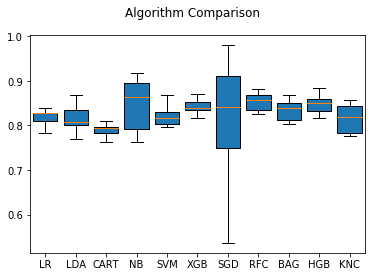

In [28]:
# prepare all the models to be used and add them to a list
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('XGB',XGBClassifier()))
models.append(('SGD',SGDClassifier()))
models.append(('RFC',RandomForestClassifier()))
models.append(('BAG',BaggingClassifier()))
models.append(('HGB',HistGradientBoostingClassifier()))
models.append(('KNC',KNeighborsClassifier()))


# evaluate each model in turn using accuracy
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results, patch_artist=True,widths = 0.8,showfliers=False)
ax.set_xticklabels(names)
plt.show()

### Based on the performance graph above, NB,LDA, and LR have higher % accuracy compared to other models, so I will use NB and LR algorithms on the un seen data to make the predictions.

### How Logistic Regression(LR) and Gaussian Naive Bayes(NB) perform on our training with some adjusted parameters.
### I used MCC, and Classification Report as measures of performance of these two models.

## Logistic Regression
### Logistic Regression is a predictive analysis algorithm and is based on the concept of probability. The hypothesis of logistic regression tends it to limit the cost function between 0 and 1.
## Mathew's Correlation Coefficient (MCC)
- MCC is used in machine learning as a measure of the quality of binary (two-class) classifications.
- The coefficient takes into account true and false positives and negatives and is generally regarded as a balanced measure which can be used even if the classes are of very different sizes.
- Matthews correlation coefficient is thought to be the most informative single score to establish the quality of a binary classifier prediction in a confusion matrix context.

In [29]:
## Using Mathew's Correlation Coefficient as a performance metrice on LR
from sklearn.metrics import matthews_corrcoef

array= Train.values
X = array[:,0:11]
Y = array[:,11]
test_size = 0.33
seed = 42
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)

model_1= LogisticRegression()
model.fit(X_train, Y_train)

predicted_1= model.predict(X_test)
matrix = matthews_corrcoef(Y_test, predicted_1)
print(matrix)

0.8075299692870389


##  Naive Bayes Classifier
### The Naïve Bayes Classifier is a classification technique based on Bayes' theorem with an assumption of independence between predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.


In [30]:
# Using Mathew's Correlation Coefficient as a performance metrice for GaussianNB
from sklearn.metrics import matthews_corrcoef

array= Train.values
X = array[:,0:11]
Y = array[:,11]
test_size = 0.33
seed = 42
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)

model = GaussianNB()
model.fit(X_train, Y_train)

predicted = model.predict(X_test)
matrix = matthews_corrcoef(Y_test, predicted)
print(matrix)

0.8367260489198274


## Classification Report
### The scikit-learn library provides a convenience report when working on classiffication prob- lems to give you a quick idea of the accuracy of a model using a number of measures. The classification report() function displays the precision, recall, F1-score and support for each class.

In [31]:
##Using classification report as a performance metric measure for LR
from sklearn.metrics import classification_report

array = Train.values
X = array[:,0:11]
Y = array[:,11]
test_size = 0.33
seed = 42
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
model = LogisticRegression()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

         0.0       0.91      0.92      0.91       489
         1.0       0.93      0.91      0.92       514

    accuracy                           0.92      1003
   macro avg       0.92      0.92      0.92      1003
weighted avg       0.92      0.92      0.92      1003



In [32]:
## Using classification report as a performance metric measure
from sklearn.metrics import classification_report

array = Train.values
X = array[:,0:11]
Y = array[:,11]
test_size = 0.33
seed = 42
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
model = GaussianNB()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92       489
         1.0       0.93      0.91      0.92       514

    accuracy                           0.92      1003
   macro avg       0.92      0.92      0.92      1003
weighted avg       0.92      0.92      0.92      1003



### Prediction scores using Gaussian Naive Bayes Classifier and Logistic Regression on the un seen data

In [33]:
## Naive bayes classifier on un seen data
from sklearn.metrics import confusion_matrix

array_2 = Train.values
X = array_2[:,0:11]
Y = array_2[:,11]
test_size = 0.33
seed = 42
 
array_3 = Test.values
F_Test = array_3[:,0:11]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)

#model =GaussianNB ()
NB_model = GaussianNB()
NB_model.fit(X, Y)

predicted = NB_model.predict(F_Test)
#matrix = confusion_matrix(Y_test, predicted)
print(predicted)

[1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [34]:
print(np.count_nonzero(predicted==1))
print(np.count_nonzero(predicted==0))

388
370


In [35]:
#Here we are trying to index our data based on the target variable to be predicted
df=pd.DataFrame(predicted)
df.columns=['CLASS']
df.index.names=["Index"]
df['CLASS']=df['CLASS'].map({0.0:False, 1.0:True})
df

,CLASS
Index,
0,True
1,True
2,True
3,True
4,False
5,True
6,True
7,True
8,True


In [36]:
## Creating a csv of the predictions of my model
df.to_csv('Monica_NB_csv')
print(df['CLASS'].unique())


[ True False]


In [37]:
type(predicted)

numpy.ndarray

### Prediction scores using Naive Bayes above
- With Baive Bayes, when i used best six features in my model, the prediction was 85.6% but when i used all the features i got accuracy of 99.5%. So, in this case i used all the features in my model.
- I went on to adjust the size to 20% and 40%, but I still got a prediction score of 99.5%.

## Prediction scores using a Logistic Regression Model on the new dataset.

In [38]:
##for LogisticRegression Model
from sklearn.metrics import confusion_matrix

array_2 = Train.values
X = array_2[:,0:11]
Y = array_2[:,11]
test_size = 0.33
np.random.seed(42)
 
array_3 = Test.values
F_Test = array_3[:,0:11]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)

LR_model = LogisticRegression()
LR_model.fit(X, Y)

predicted= LR_model.predict(F_Test)
#matrix = confusion_matrix(Y_test, predicted)
print(predicted)

[0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [39]:
print(np.count_nonzero(predicted==1))
print(np.count_nonzero(predicted==0))

375
383


In [40]:
## Indexing our data based on the target variable which is 'CLASS' in this case.
df_1=pd.DataFrame(predicted)
df_1.columns=['CLASS']
df_1.index.names=["Index"]
df_1['CLASS']=df_1['CLASS'].map({0.0:False, 1.0:True})
df_1

,CLASS
Index,
0,False
1,False
2,True
3,True
4,False
5,True
6,True
7,False
8,True


In [41]:
## Converting the dataframe to a csv format for submission of the prediction scores
df_1.to_csv('M.Monica_LG1_csv')
print(df_1['CLASS'].unique())

[False  True]


# Save and Load Machine Learning Models in Python with scikit-learn
*** Finding an accurate machine learning model is not the end of the project.****
## After developing a Machine Learning Model, we'll need to save our prediction models to file, and then restore them in order to reuse or making predictions.
## WHY We need to save and restore/reload later our ML Model , so as to;
-  test our model on/with new data,

- compare multiple models
## Object serialization: This is a process / procedure of saving a ML Model is also known as object serialization - representing an object with a stream of bytes, in order to store it on disk, send it over a network or save to a database.
## Deserialization: This is restoring/reloading of ML Model procedure is known as deserialization.
## We can look at 3 approaches of Saving and Reloading a ML Model:
1) Pickle Approach

2) Joblib Approach

3) Manual Save and Restore to JSON approach



In [42]:
## let's use the Joblib to save our ML model for reuse later.
from sklearn.externals import joblib
joblib_file = "joblib_RL_Model.pkl"
joblib.dump(NB_model, joblib_file)

['joblib_RL_Model.pkl']